In [3]:
import matplotlib.pyplot as plt
import pickle
from skimage.transform import rotate
from scipy import ndimage
from skimage.util import img_as_ubyte
from joblib import Parallel, delayed
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product
import seaborn as sns

#import sys
#sys.path.append("../lifelong_learner")
#from lf import LF

%matplotlib inline

In [4]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
task = range(0,10,1)
ntrees = range(10,300,10)

ntask = len(task)
n_ntrees = len(ntrees)

err = np.zeros((ntask,n_ntrees),dtype=float)

for t in task:
    for count,tree in enumerate(ntrees):
        filename = '../result/task_minibatch'+str(t)+'__'+str(tree)
        err[t-1,count] = 1 - unpickle(filename)
        


In [6]:
err

array([[0.30673333, 0.34583333, 0.35803333, 0.36966667, 0.37566667,
        0.38301667, 0.38465   , 0.38731667, 0.39175   , 0.39143333,
        0.39405   , 0.39518333, 0.39678333, 0.39816667, 0.39943333,
        0.39871667, 0.40008333, 0.40126667, 0.40163333, 0.40451667,
        0.40545   , 0.40513333, 0.40528333, 0.40495   , 0.40461667,
        0.4054    , 0.40588333, 0.40641667, 0.40735   ],
       [0.30525   , 0.34253333, 0.3576    , 0.37105   , 0.37675   ,
        0.38263333, 0.38653333, 0.38723333, 0.39001667, 0.39333333,
        0.39255   , 0.3944    , 0.39588333, 0.39768333, 0.39773333,
        0.39933333, 0.40001667, 0.39943333, 0.40146667, 0.40038333,
        0.40226667, 0.4026    , 0.40285   , 0.40418333, 0.4048    ,
        0.40356667, 0.40516667, 0.40471667, 0.40515   ],
       [0.30336667, 0.34043333, 0.3594    , 0.3701    , 0.37693333,
        0.38231667, 0.38456667, 0.38765   , 0.39011667, 0.3933    ,
        0.39336667, 0.39551667, 0.39756667, 0.39735   , 0.39955   ,
  

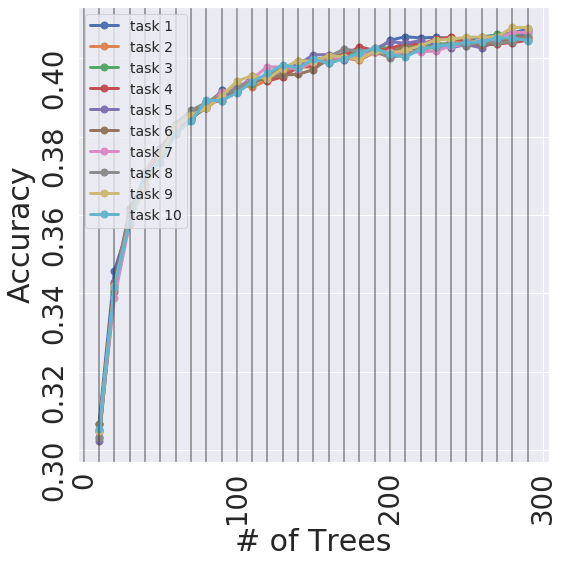

In [8]:
sns.set()

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    ax.plot(ntrees, err[i,:], marker='.', label = 'task '+str(i+1), markersize=14, linewidth=3)

#ax.set_xticks([100,1000,2000,3000,4000,5000])
#ax.set_yticks([0.9, 1.0, 1.1, 1.2])
#ax.set_ylim(0.89, 1.21)
ax.tick_params(labelsize=27.5,rotation=90)
ax.legend(loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('# of Trees', fontsize=30)

#ax.grid(axis='x')

for i in range(0,300,10):
    ax.axvline(x = i, linewidth=1.5,alpha=0.5, color='k')

#ax.axvline(x = 3500, linewidth=3, color='k')

#ax.hlines(0.422, 1,5000, colors='k', linestyles='dashed',linewidth=2)

plt.tight_layout()


plt.savefig('/data/Jayanta/tasks.png',dpi=500)